In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

medals = pd.read_csv('medals_by_country_2016.csv', index_col=0)
summer_2016 = pd.read_csv('summer2016.csv')
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [3]:
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


/tmp/ipykernel_1742/605312062.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


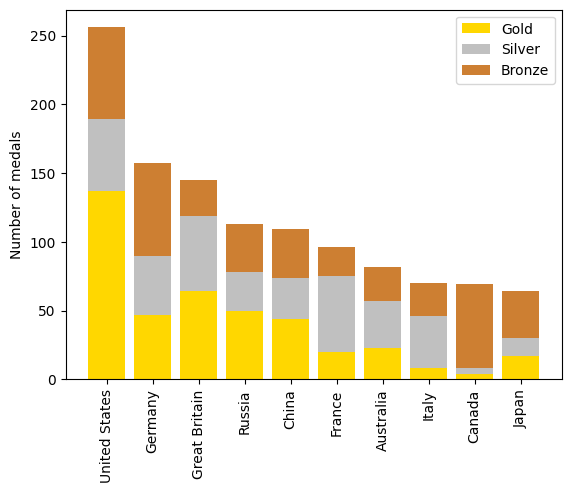

In [4]:
fig, ax = plt.subplots()

ax.bar(medals.index, medals["Gold"], label="Gold", color="#FFD700")
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver", color="#C0C0C0")
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze", color="#CD7F32")

ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of medals")

#Activating the label params
ax.legend()

plt.show()

In [5]:
summer_2016.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [14]:
## Selectioning the categories "rowing" and "gymnastics" for men
rowing = summer_2016[summer_2016["Sport"] == "Rowing"]
mens_rowing = rowing[rowing["Sex"] == "M"]
gymnastics = summer_2016[summer_2016["Sport"] == "Gymnastics"]
mens_gymnastics = gymnastics[gymnastics["Sex"] == "M"]

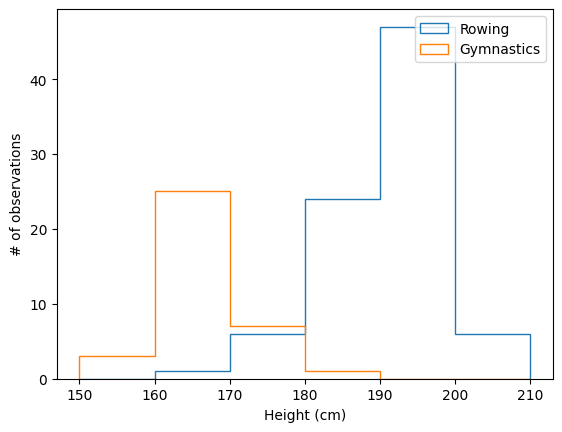

In [15]:
fig, ax = plt.subplots()
ax.hist(mens_rowing["Height"], label="Rowing",bins=range(150, 220, 10), histtype="step")
ax.hist(mens_gymnastics["Height"], label="Gymnastics", bins=range(150, 220, 10), histtype="step")

ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

### Assessing whether the difference is substantial relative to the variability within each group.

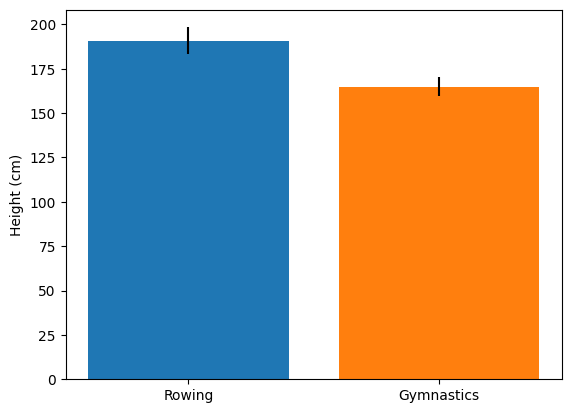

In [16]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr=mens_rowing["Height"].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr=mens_gymnastics["Height"].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

### Boxplots to identify the distribution and outliers, 

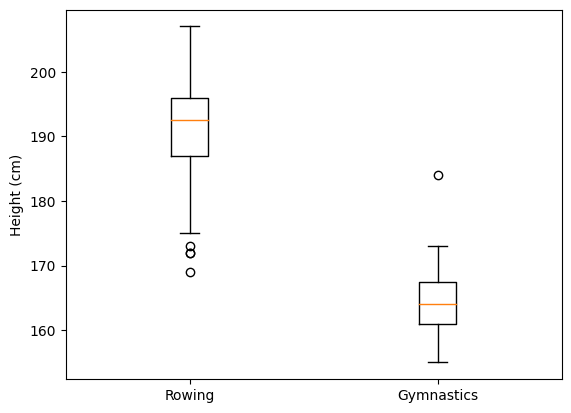

In [18]:
fig, ax = plt.subplots()

# Adding a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Adding x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Adding a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

/tmp/ipykernel_1742/2593525111.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


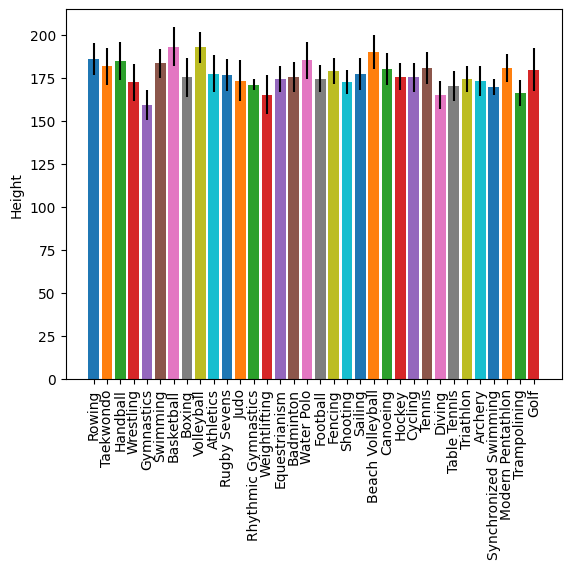

In [30]:
# Extract the "Sport" column
sports_column = summer_2016["Sport"]

# Find the unique values of the "Sport" column
sports = sports_column.unique()

fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016[summer_2016["Sport"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Height"].mean(), yerr=sport_df["Height"].std())

ax.set_ylabel("Height")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
plt.show()